In [1]:
from dotenv import dotenv_values
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
spark = SparkSession.builder.master(
    "local[*]").appName("Kevin Ang Data Visualization").getOrCreate()

config = dotenv_values(".env")
dbuser = config["dbuser"]
dbpass = config["dbpass"]


In [2]:
cc_df = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",
                                       user=dbuser,
                                       password=dbpass,
                                       url="jdbc:mysql://localhost:3306/creditcard_capstone",
                                       dbtable="creditcard_capstone.CDW_SAPP_CREDIT_CARD").load()

cust_df = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",
                                       user=dbuser,
                                       password=dbpass,
                                       url="jdbc:mysql://localhost:3306/creditcard_capstone",
                                       dbtable="creditcard_capstone.CDW_SAPP_CUSTOMER").load()                             


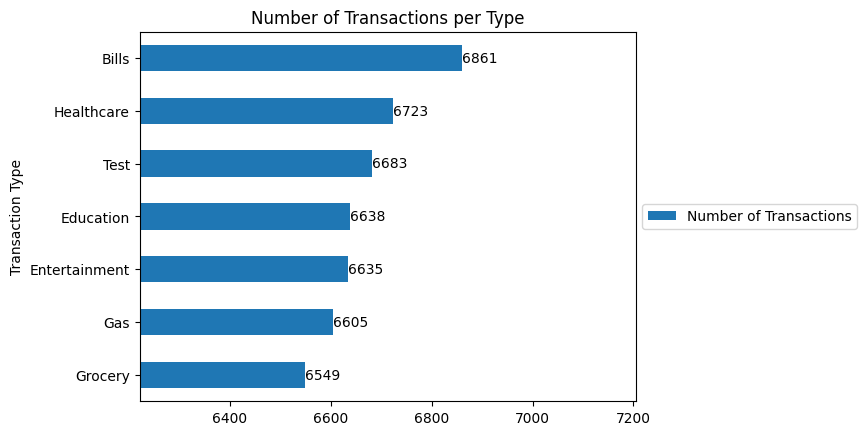

In [3]:
# Find and plot which transaction type has a high rate of transactions.
pandas_cc_df = cc_df.toPandas()
pandas_cc_df = pandas_cc_df[['TRANSACTION_TYPE', 'CUST_CC_NO']].groupby(
    'TRANSACTION_TYPE').count().sort_values('CUST_CC_NO')
cc_plot = pandas_cc_df.plot(kind='barh',
                            title='Number of Transactions per Type',
                            xlabel='Transaction Type')
cc_plot.legend(['Number of Transactions'],
               loc='center left', bbox_to_anchor=(1.0, 0.5))
cc_plot.bar_label(cc_plot.containers[0])

plt.xlim([pandas_cc_df.min().values[0]*0.95,
         pandas_cc_df.max().values[0]*1.05])

plt.show()
plt.close()


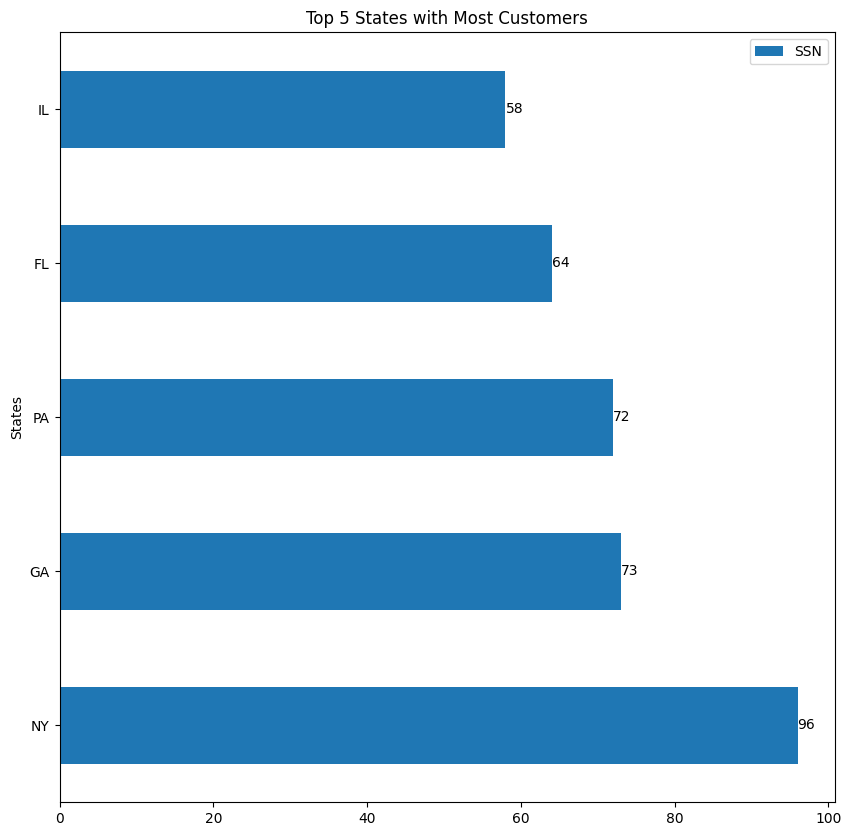

In [4]:
# Find and plot which state has a high number of customers.
pandas_cust_df = cust_df.toPandas()
pandas_cust_df = pandas_cust_df[['SSN', 'CUST_STATE']].groupby(
    'CUST_STATE').count().sort_values('SSN',ascending=False).head()

cust_plot = pandas_cust_df.plot(kind='barh',
                    figsize=(10, 10),
                    title='Top 5 States with Most Customers',
                    xlabel='States')

cust_plot.bar_label(cust_plot.containers[0])

plt.show()
plt.close()

[]

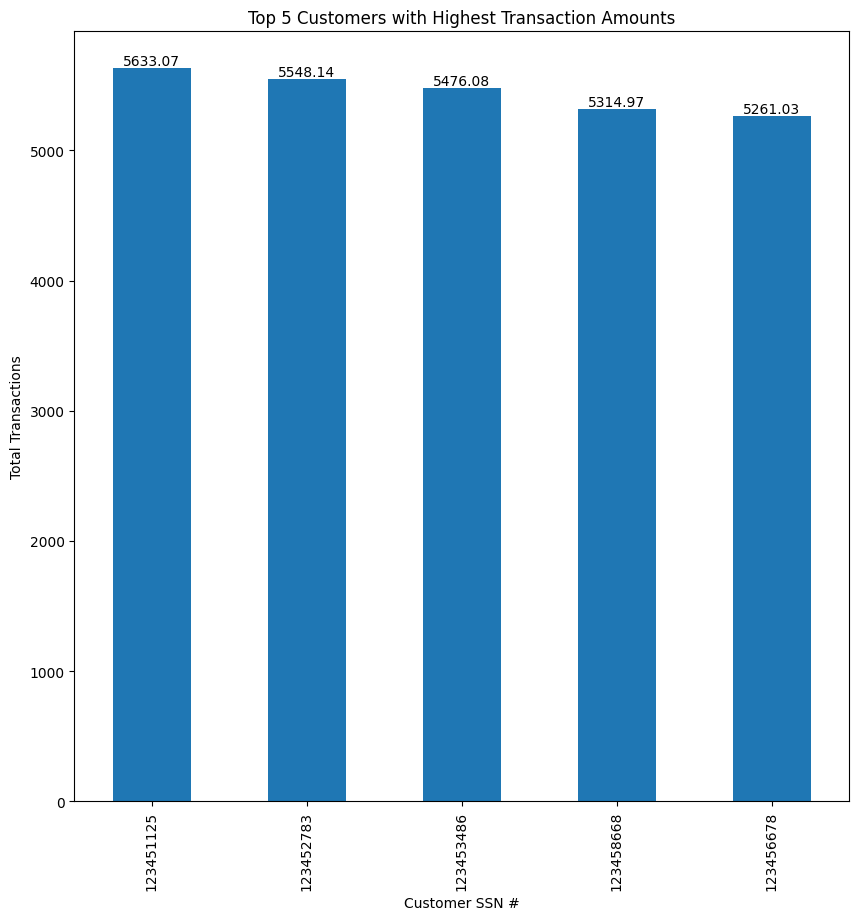

In [5]:
# Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
# hint(use CUST_SSN).

pandas_cc_df = cc_df.toPandas()
pandas_cc_df = pandas_cc_df.groupby(
    'CUST_SSN')['TRANSACTION_VALUE'].sum().sort_values(ascending=False)

highestTransaction_plot = pandas_cc_df.head().plot(kind='bar',
                                                   figsize=(10, 10),
                                                   xlabel='Customer SSN #',
                                                   ylabel='Total Transactions',
                                                   title='Top 5 Customers with Highest Transaction Amounts')

highestTransaction_plot.bar_label(highestTransaction_plot.containers[0])

plt.plot()


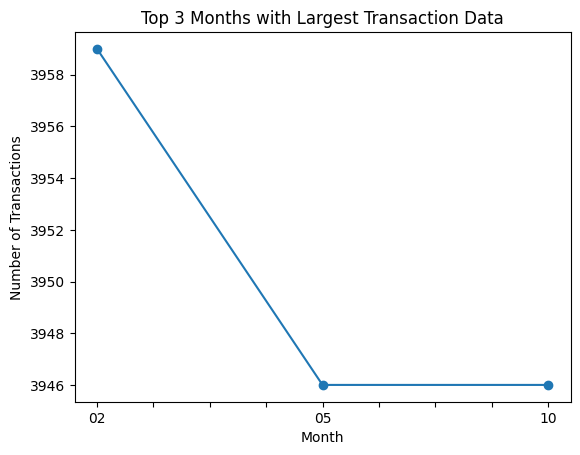

In [6]:
# Find and plot the top three months with the largest transaction data.
pandas_cc_df = cc_df.toPandas()

pandas_cc_df['MONTH'] = pandas_cc_df['TIMEID'].str[4:6]

pandas_cc_df = pandas_cc_df.groupby(
    'MONTH')['TRANSACTION_VALUE'].count().sort_values(ascending=False).head(3).sort_index()

month_plot = pandas_cc_df.plot(marker='o',
                               title='Top 3 Months with Largest Transaction Data',
                               xlabel='Month',
                               ylabel='Number of Transactions')


In [7]:
# Find and plot which branch processed the highest total dollar value of healthcare transactions.
pandas_cc_df = cc_df.toPandas()
pandas_cc_df = pandas_cc_df[pandas_cc_df["TRANSACTION_TYPE"]=='Healthcare']
pandas_cc_df = pandas_cc_df[['BRANCH_CODE','TRANSACTION_VALUE']]
print(pandas_cc_df)

       BRANCH_CODE  TRANSACTION_VALUE
27              43              98.78
32             117              24.37
43              36              79.91
44             124              20.81
48              69              26.34
...            ...                ...
46633           66              10.03
46675            2              70.01
46680           38              72.78
46686           63               5.56
46693           45              82.29

[6723 rows x 2 columns]
